# **Demo: Glucose Level Predicting using Mulitple Linear Regression**

In this demo, you will learn how to:
* Split data into training and test.  
* Fit multiple linear regression models using python's `sklearn` package.
* Manipulate and visualize multivariable arrays.

### **Part A. Simple Linear Regression**

We first load the packages as usual.

In [119]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

**Step1: Load Diabetes Dataset**

To illustrate the concepts, we load the open diabetes(糖尿病) dataset.  This dataset is included in the `sklearn.datasets` module and can be loaded as follows.

In [120]:
from sklearn import datasets, linear_model

# Load the diabetes dataset
diabetes = datasets.load_diabetes()
X = diabetes.data  # X: data matrix [442, 10]
y = diabetes.target  # y: target values

The target values are stored in the vector `y`.  The attributes for the diabetes data are stored in a data matrix, `X`.  The size is is number of samples (442) x number of attributes (10).

**Step 2: Print the description of the dataset**

In [121]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

Print the value of first feature, that is, age, and the target values

In [122]:
print("X[:,0]\n", X[:, 0])
print("y\n", y)

X[:,0]
 [ 0.03807591 -0.00188202  0.08529891 -0.08906294  0.00538306 -0.09269548
 -0.04547248  0.06350368  0.04170844 -0.07090025 -0.09632802  0.02717829
  0.01628068  0.00538306  0.04534098 -0.05273755 -0.00551455  0.07076875
 -0.0382074  -0.02730979 -0.04910502 -0.0854304  -0.0854304   0.04534098
 -0.06363517 -0.06726771 -0.10722563 -0.02367725  0.05260606  0.06713621
 -0.06000263 -0.02367725  0.03444337  0.03081083  0.01628068  0.04897352
  0.01264814 -0.00914709 -0.00188202 -0.00188202  0.00538306 -0.09996055
 -0.06000263  0.01991321  0.04534098  0.02717829 -0.05637009 -0.07816532
  0.06713621 -0.04183994  0.03444337  0.05987114 -0.05273755 -0.00914709
 -0.04910502 -0.04183994 -0.04183994 -0.02730979  0.04170844  0.06350368
 -0.07090025 -0.04183994 -0.02730979 -0.03457486  0.06713621 -0.04547248
 -0.00914709  0.04170844  0.03807591  0.01628068 -0.00188202 -0.00188202
  0.06350368  0.01264814  0.01264814 -0.00914709 -0.03094232 -0.09632802
  0.00538306 -0.10359309  0.07076875  0.012

**Step 3: Extract the numbers of samples and attributes**

In [123]:
nsamp, natt = X.shape  # nsamp:the number of samples; natt:the number of attributes
print("the num of samples = {}".format(nsamp))
print("the num of attributes = {}".format(natt))

the num of samples = 442
the num of attributes = 10


**Step 4: Perform Simple Linear Regression for Each Feature Individually**

As a first attempt to predict the glucouse level, we could try *one attribute at a time*.  That is, for each attribute $x_k$, we could attempt to fit a [simple linear regression](../simp_lin_reg/readme.md) model:
$$ \hat{y} = \beta_{0,k} + \beta_{1,k}x_k$$
where $\beta_{0,k}$ and $\beta_{1,k}$ are the coefficients in the simple linear regression model using only the attribute $x_k$.

Now, we saw in class, that the goodness of fit in a simple linear regression model is given by the coefficient of determination.  Let $R_k^2$ be the coefficient for predicting $y$ from the $k$-th predictor $x_k$:
$$R^2_k = \frac{|s_{x_k,y}|^2}{s_{x_k}^2 s_y^2}.$$
The following code computes $R^2_k$ for each variable $k$ as well as the coefficients in the linear model, $\beta_{0,k}$ and $\beta_{1,k}$

In [124]:
ym = np.mean(y)                       #The mean of target y
syy = np.mean((y-ym)**2)              #The variance of target y
Rsq = np.zeros(natt)                  #Create a Rsq matrix 
beta0 = np.zeros(natt)                #Create a beta0 vector 
beta1 = np.zeros(natt)                #Create a beta1 vector

for k in range(natt):
  xm = np.mean(X[:, k])               #The mean of feature k
  sxy = np.mean((X[:, k]-xm)*(y-ym))  #The covariance of feature k and target y
  sxx = np.mean((X[:, k]-xm)**2)      #The variance of feature k
  beta1[k] = sxy/sxx
  beta0[k] = ym-beta1[k]*xm
  Rsq[k] = (sxy)**2/sxx/syy
  print("Feature{0:2d}: R-squared(Rsq) = {1:f}; Intersect(beta0) = {2:f}; Slope(beta1) = {3:f}".format(k, Rsq[k], beta0[k], beta1[k]))

Feature 0: R-squared(Rsq) = 0.035302; Intersect(beta0) = 152.133484; Slope(beta1) = 304.183075
Feature 1: R-squared(Rsq) = 0.001854; Intersect(beta0) = 152.133484; Slope(beta1) = 69.715356
Feature 2: R-squared(Rsq) = 0.343924; Intersect(beta0) = 152.133484; Slope(beta1) = 949.435260
Feature 3: R-squared(Rsq) = 0.194906; Intersect(beta0) = 152.133484; Slope(beta1) = 714.738259
Feature 4: R-squared(Rsq) = 0.044954; Intersect(beta0) = 152.133484; Slope(beta1) = 343.254452
Feature 5: R-squared(Rsq) = 0.030295; Intersect(beta0) = 152.133484; Slope(beta1) = 281.784593
Feature 6: R-squared(Rsq) = 0.155859; Intersect(beta0) = 152.133484; Slope(beta1) = -639.145279
Feature 7: R-squared(Rsq) = 0.185290; Intersect(beta0) = 152.133484; Slope(beta1) = 696.883030
Feature 8: R-squared(Rsq) = 0.320223; Intersect(beta0) = 152.133484; Slope(beta1) = 916.137375
Feature 9: R-squared(Rsq) = 0.146294; Intersect(beta0) = 152.133484; Slope(beta1) = 619.222821


We see that the best $R^2_k = 0.34$.  That is, only about 34% of the variance is explained by a linear model with any one variable.  We can see this somewhat poor fit in the scatter plot as well where there is a significat variation from the regression line.
Also notice that beta0 are all the same no matter which attribute is used to predict the target!

**Step 5: Plot the regression for the best feature**

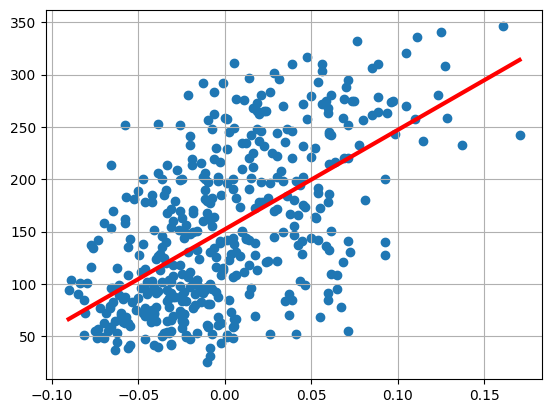

In [125]:
# Find the index of the single variable with the best R^2
imax = np.argmax(Rsq)

# Regression line over the range of x values
xmin = np.min(X[:, imax])
xmax = np.max(X[:, imax])
ymin = beta0[imax] + beta1[imax]*xmin
ymax = beta0[imax] + beta1[imax]*xmax

# plt.plot([xmin, xmax], [ymin, ymax], 'r-', linewidth=3)
plt.plot([xmin, xmax], [ymin, ymax], color='red', linewidth=3)
plt.grid()

# Scatter plot of points
plt.scatter(X[:, imax], y)

Note that the calculations above could have been done without a for-loop using Python broadcasting:

In [126]:
# Remove the means
ym = np.mean(y)
y1 = y-ym  # a column vecotor each minus mean

# averaging over column, resulting a row vector of dimension natt
Xm = np.mean(X, axis=0) # axis=0 means along the column, axis=1 means along the row
X1 = X - Xm[None, :]  # minus the same mean in each column

# Compute the correlations per features
syy = np.mean(y1**2)

# a row vector with each element indicating the variance of one attribute
Sxx = np.mean(X1**2, axis=0)

# a row vector with each element indicating the covarance on one attribute to the targer
Sxy = np.mean(X1*y1[:, None], axis=0)

# Compute the coefficients and R^2 value per feature
beta1 = Sxy/Sxx  # element wise division, resulting a row vector containing  beta1 for each attribute

# element wise multiplication, resulting a row vector containing beta0 for each attribute
beta0 = ym - beta1*Xm
Rsq = Sxy**2/Sxx/syy  # a row vector containing Rsq for each attribute

Now let us see whether we get the same result:

In [127]:
for k in range(natt):
    print("Feature{0:2d}: R-squared(Rsq) = {1:f}; beta0 = {2:f}; beta1 = {3:f}".format(k, Rsq[k], beta0[k], beta1[k]))

Feature 0: R-squared(Rsq) = 0.035302; beta0 = 152.133484; beta1 = 304.183075
Feature 1: R-squared(Rsq) = 0.001854; beta0 = 152.133484; beta1 = 69.715356
Feature 2: R-squared(Rsq) = 0.343924; beta0 = 152.133484; beta1 = 949.435260
Feature 3: R-squared(Rsq) = 0.194906; beta0 = 152.133484; beta1 = 714.738259
Feature 4: R-squared(Rsq) = 0.044954; beta0 = 152.133484; beta1 = 343.254452
Feature 5: R-squared(Rsq) = 0.030295; beta0 = 152.133484; beta1 = 281.784593
Feature 6: R-squared(Rsq) = 0.155859; beta0 = 152.133484; beta1 = -639.145279
Feature 7: R-squared(Rsq) = 0.185290; beta0 = 152.133484; beta1 = 696.883030
Feature 8: R-squared(Rsq) = 0.320223; beta0 = 152.133484; beta1 = 916.137375
Feature 9: R-squared(Rsq) = 0.146294; beta0 = 152.133484; beta1 = 619.222821


## **Part B: Improvement with a Multiple Variable Linear Model**

One possible way to try to improve the fit is to use multiple variables at the same time.  We can fit the multipe linear model using the `sklearn` package.  

**Step 1. Separate training and validation datasets**

Split the data into two parts:  one part for training the model and a second part for validating the fit.  In this example, we use `ns_train=300` samples for training and the remaining `ns_train=442-300=142` for validation.

In [128]:
ns_train = 300            # The number of training samples
ns_test = nsamp-ns_train  # The number of validation sample
X_tr = X[:ns_train, :]    # Gets the first ns_train rows of X
y_tr = y[:ns_train]       # Gets the correspoinding rows of y

**Step 2. Fitting using function `LinearRegression` in `sklearn` package**

To fit the linear model, we first create a regression object and then fit the data with regression object.

In [129]:
# Create a LinearRegression object
regr = linear_model.LinearRegression()

# Perform regression
regr.fit(X_tr, y_tr)

LinearRegression()

You can see the coefficients

In [130]:
print("Intercept:", regr.intercept_)
print("Coefficients:", regr.coef_)

Intercept: 152.34779643323938
Coefficients: [ -16.57338609 -254.66343751  560.9894609   278.90965232 -393.45557666
   97.08855335  -18.9842756   169.46616165  632.96847103  114.21833048]


Compute the RSS (per sample) and the R^2 on the training data

In [131]:
y_tr_pred = regr.predict(X_tr)
n_RSS_tr = np.mean((y_tr_pred-y_tr)**2)/(np.std(y_tr)**2)
Rsq_tr = 1-n_RSS_tr
print("normalized RSS = {0:f}".format(n_RSS_tr))
print("           R^2 = {0:f}".format(Rsq_tr))

normalized RSS = 0.485281
           R^2 = 0.514719


We see R^2 is higher than the best single variable model -- more than 51% of the target variance is explained by the model instead of just 34% for the best single variable model.  

**Step 3. Create a scatter plot of predicted vs. actual**

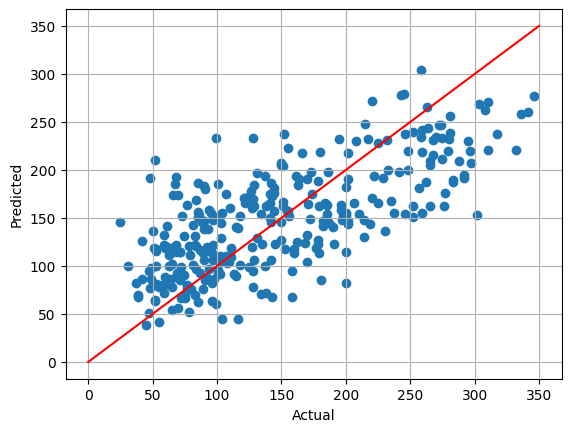

In [132]:
plt.scatter(y_tr, y_tr_pred)
plt.plot([0, 350], [0, 350], color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()

## **Part C. Model validation**

We should evaluate the performance of a model on the data on which it is trained.  It is important to see how the model works on *new* data that is independent of the training data set.  For this reason, we evaluate the model on the *validation* samples that were not used in training.

In [133]:
# Extract validation set
X_val = X[ns_train:, :]
y_val = y[ns_train:]

# Predict the validation set
y_val_pred = regr.predict(X_val)

# Evaluate the performance
RSS_val = np.mean((y_val_pred-y_val)**2)/(np.std(y_val)**2)
Rsq_val = 1 - RSS_val
print("RSS per sample = {0:f}".format(RSS_val))
print("           R^2 = {0:f}".format(Rsq_val))

RSS per sample = 0.492804
           R^2 = 0.507196


We see that the model predicts new samples almost as well as it did the training samples.  We can also plot the fit on the validation data.

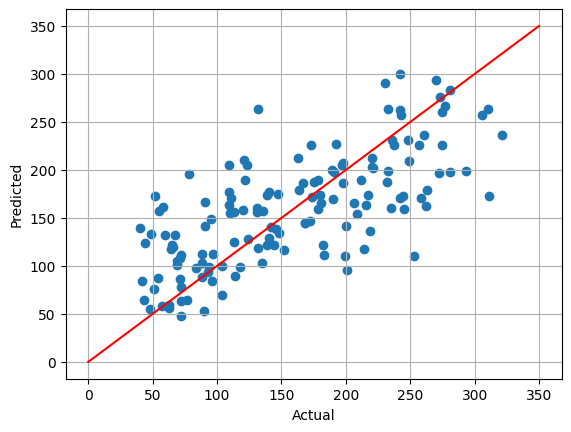

In [134]:
plt.scatter(y_val, y_val_pred)
plt.plot([0, 350], [0, 350], color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()

## **Part D. Computie the Coefficients without `sklearn` package** 

We can compute the regression coefficients using the least-squares matrix formula in class.  Of course, using the `sklearn` package is easier.  I illustrate this computation to show what is happening "under the hood" of the linear regression routine. 

**Step 1: Contruct the matrix**

To compute the coefficients, we first construct the matrix $\mathbf{A} = [ \mathbf{1} ~ \mathbf{X} ]$.  This is performed with the `ones` command and `hstack`.  Note that after we do this, `A` has 11 columns -- one more column that the data matrix `X_tr`.

In [135]:
ones = np.ones((ns_train, 1))
A = np.hstack((ones, X_tr))
A.shape

(300, 11)

**Step 2:Solve the least-squared linear system**

We next use the `lstsq` method to solve $\mathbf{y} \approx \mathbf{A\beta}$.  This will find the desired least-squares fit.

Refer the description of funtion `lstsq` to https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html

In [136]:
out = np.linalg.lstsq(A, y_tr, rcond=None)
beta = out[0]
print(beta)

[ 152.34779643  -16.57338609 -254.66343751  560.9894609   278.90965232
 -393.45557666   97.08855335  -18.9842756   169.46616165  632.96847103
  114.21833048]


We see that `beta[0]` mathches the intercept in `regr.intercept_` from the regression fit and `beta[1:]` matches the coefficients in `regr.coef_`.

In [137]:
print("Coefficients:\n", regr.coef_)
print("\nIntercept:", regr.intercept_)

Coefficients:
 [ -16.57338609 -254.66343751  560.9894609   278.90965232 -393.45557666
   97.08855335  -18.9842756   169.46616165  632.96847103  114.21833048]

Intercept: 152.34779643323938


**Step3: Check the results**

Now let us verify this is the same as direct matrix calculation.  For a small problem like this, it makes no difference.  But, in general, using a matrix inverse like this is *much* slower computationally than using either the `lstsq` method or the `LinearRegression` class.  So, **do not ever** solve a least squares problem like this.
ATAx=ATb

In [138]:
beta = np.linalg.inv(A.T.dot(A)).dot(A.T.dot(y_tr))
print(beta)

[ 152.34779643  -16.57338609 -254.66343751  560.9894609   278.90965232
 -393.45557666   97.08855335  -18.9842756   169.46616165  632.96847103
  114.21833048]
